#Tambahkan value aneh, dengan menggunakan .unique
object sama string beda
agent lebih baik diganti menjadi string
stage 1 nggak papa mengubah tipe data
Undefined meal jadi NAN
Reservation status date di cacah jadi tanggal, bulan, tahun
Email : gmail dll
Credit card dicacah coba dicari maknanya
Pemodelan pilih fitur yang korelasi tinggi dengan target (lebih dari 0.7 atau kurang dari 0.7)
Feature selection
anova f test: feature numeric, target categoric
chi square: feature categoric, terget categoric

Kategorik
ordinal ada ranking
nominal setara

Distribusi
Ditentukan, lalu handling

Point statement
Treatment nya

Outlier pakai IQR

Feature transformation

In [1]:
#import library FP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
df = pd.read_csv("hotel_booking.csv") #Load original dataset
pd.set_option("display.max_columns", None)
#copy data for backup
df2 = df.copy()

In [7]:
#check duplicate data
print('rows of duplicated data:', df.duplicated().sum())

rows of duplicated data: 0


In [8]:
# Check the null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
## Handling null values
# Nilai null di column 'children' mungkin keluarga tidak mempunyai anak
df['children'] = df['children'].fillna(0)
# Dari kaggle dataset column 'agent', dan 'company' merupakan sebuah id. 
#Sehingga null value, kemungkinan memiliki arti bahwa pengunjung tidak memesan melalui 'agent' dan 'company' sehingga dimasukkan 0 
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
# Dari kaggle dataset column 'country' merupakan singkatan nama negara.
# Maka null kemungkinan berarti tidak punya negara maka null akan di isi 'NON' yang berarti tidak punya kewarganegaraan
df['country'] = df['country'].fillna('NON')

In [10]:
# Check null values again
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
#Memperbaiki tipe data
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
#Mengecek nilai aneh di kolom meal
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [15]:
# Mengganti Undefined meal sebagai missing Values NAN
df['meal'] = df['meal'].replace(['Undefined'], 'NAN')
df['meal'].value_counts()

BB     92310
HB     14463
SC     10650
NAN     1169
FB       798
Name: meal, dtype: int64

In [17]:
# Remove unnecessary data with 0 guest and 0 night
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
# Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))
# Remove unnecessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


In [21]:
#Mengedrop kolom tdk berguna di dataset
df_clean = df_clean.drop(columns = ['adults','children','babies','stays_in_weekend_nights','stays_in_week_nights'])

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118565 non-null  object        
 1   is_canceled                     118565 non-null  int64         
 2   lead_time                       118565 non-null  int64         
 3   arrival_date_year               118565 non-null  int64         
 4   arrival_date_month              118565 non-null  object        
 5   arrival_date_week_number        118565 non-null  int64         
 6   arrival_date_day_of_month       118565 non-null  int64         
 7   meal                            118565 non-null  object        
 8   country                         118565 non-null  object        
 9   market_segment                  118565 non-null  object        
 10  distribution_channel            118565 non-null  object 

In [23]:
df_clean.to_csv('Data_Hotel_Cleaning.csv', index=False)

In [2]:
df_baru = pd.read_csv("Data_Hotel_Cleaning.csv")
df_baru;

In [17]:
df_baru.corr();

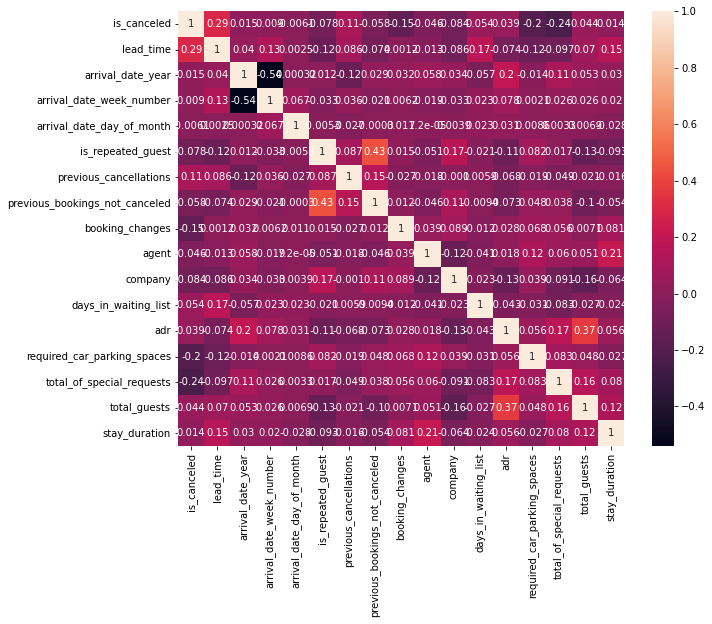

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df_baru.corr(),annot=True)
plt.show()

In [5]:
nums= ['stay_duration', 'total_guests', 'total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list',
       'booking_changes']

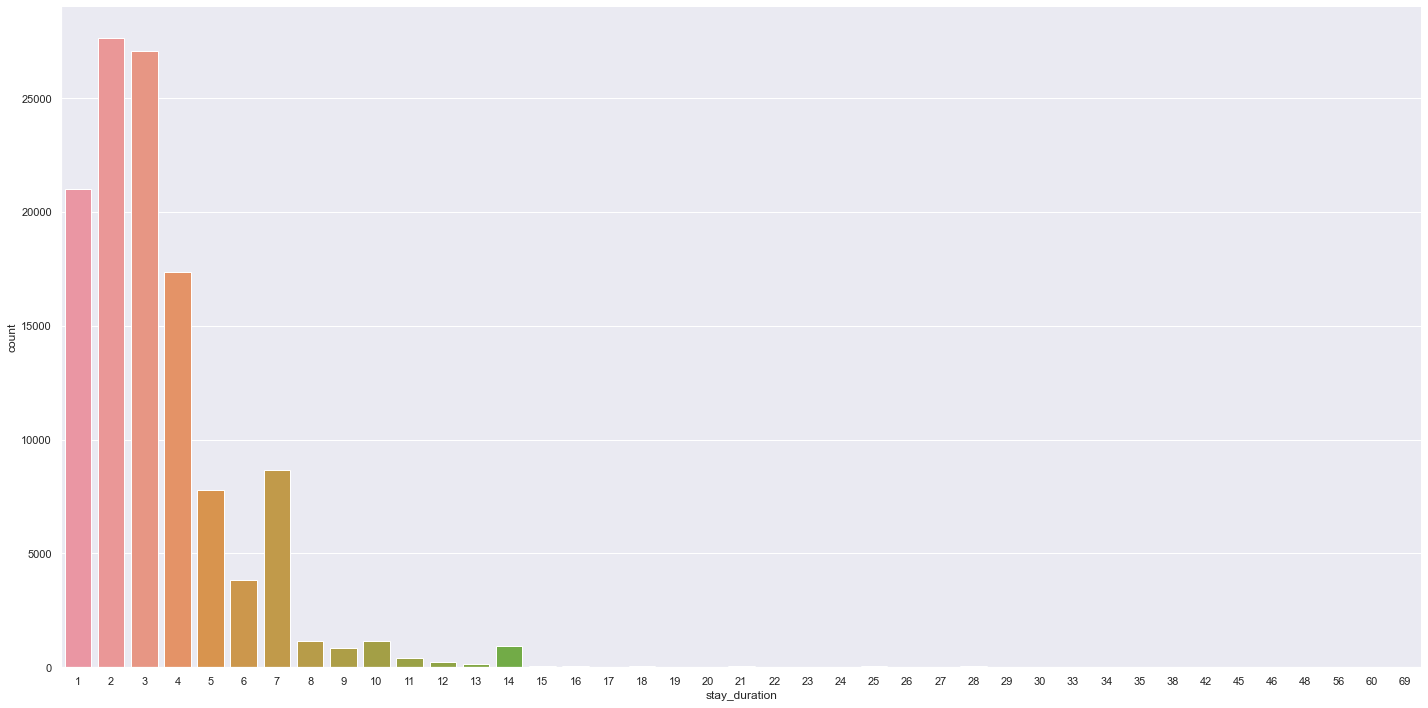

In [28]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,10)})
sns.catplot(x='stay_duration', 
            data=df_baru, 
            kind="count",height = 10, aspect = 2)


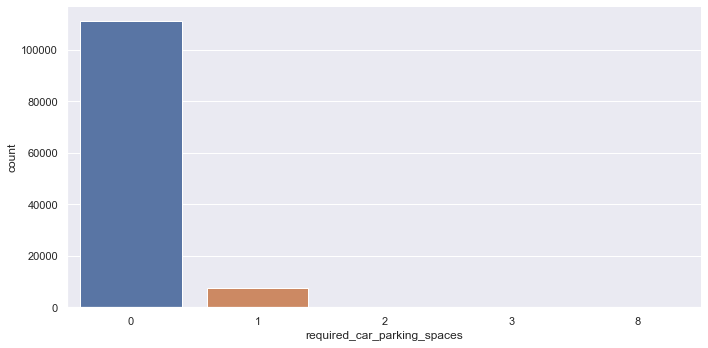

In [29]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,10)})
sns.catplot(x='required_car_parking_spaces', 
            data=df_baru, 
            kind="count",height = 5, aspect = 2)

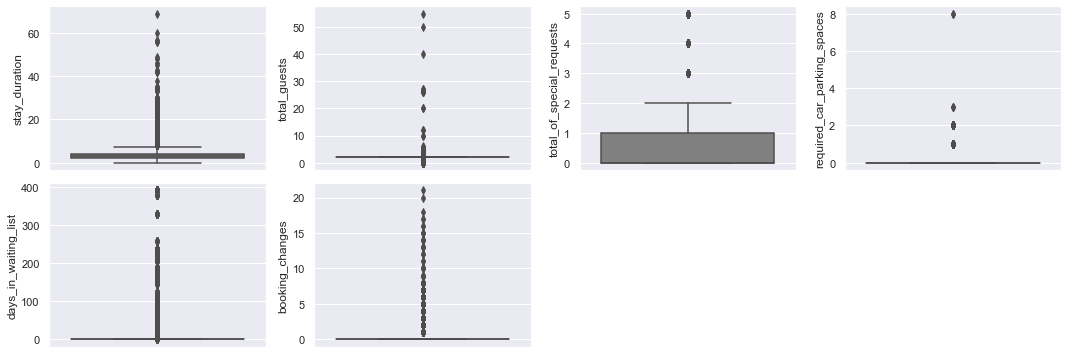

In [30]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

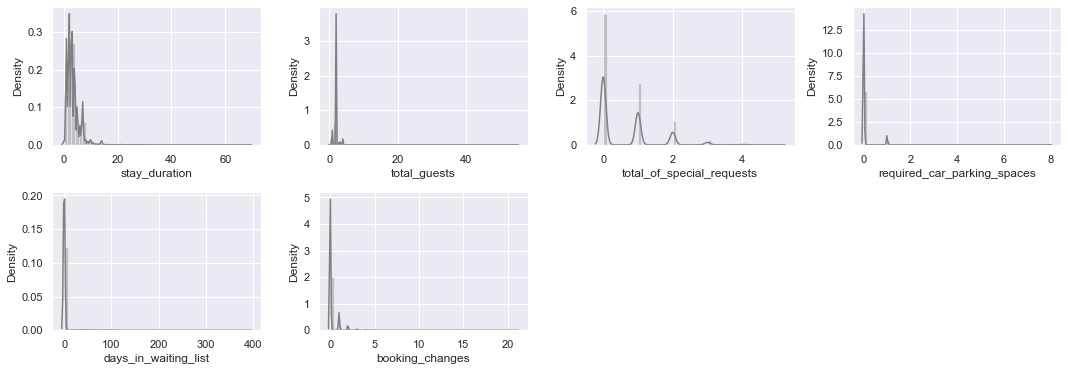

In [31]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

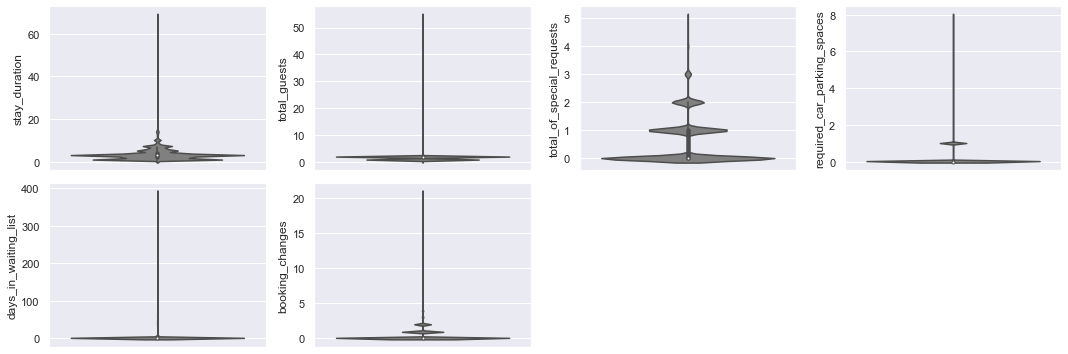

In [32]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [110]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,1.968239,3.427900
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.722394,2.557439
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


In [111]:
df_backup = df_baru.copy()

In [6]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_baru)}')
filtered_entries = np.array([True] * len(df_baru))

for col in nums:
    zscore = abs(stats.zscore(df_baru[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_baru = df_baru[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_baru)}')

Jumlah baris sebelum memfilter outlier: 118565
Jumlah baris setelah memfilter outlier: 103871


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

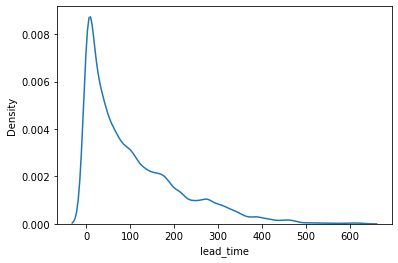

In [20]:
sns.kdeplot(data = df_baru['lead_time'])

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

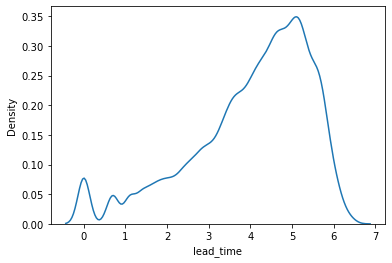

In [21]:
sns.kdeplot(data = np.log(df_baru['lead_time']))

In [9]:
#Scaling
df_baru['stay_duration'] = StandardScaler().fit_transform(df_baru['stay_duration'].values.reshape(len(df_baru), 1))
df_baru['total_guests'] = StandardScaler().fit_transform(df_baru['total_guests'].values.reshape(len(df_baru), 1))

In [10]:
df_baru['stay_duration'].unique()

array([-1.14017818, -0.63678437, -0.13339056,  0.37000324,  0.87339705,
        1.37679086,  1.88018466,  3.39036609,  3.89375989,  2.38357847,
        2.88697228])

In [11]:
df_baru['total_guests'].unique()

array([-1.51417131,  0.07916764,  1.6725066 ,  3.26584556])

In [23]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103871 entries, 0 to 118564
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103871 non-null  object 
 1   is_canceled                     103871 non-null  int64  
 2   lead_time                       103871 non-null  int64  
 3   arrival_date_year               103871 non-null  int64  
 4   arrival_date_month              103871 non-null  object 
 5   arrival_date_week_number        103871 non-null  int64  
 6   arrival_date_day_of_month       103871 non-null  int64  
 7   meal                            103871 non-null  object 
 8   country                         103871 non-null  object 
 9   market_segment                  103871 non-null  object 
 10  distribution_channel            103871 non-null  object 
 11  is_repeated_guest               103871 non-null  int64  
 12  previous_cancell

In [7]:
# pemisahan features vs target
X = df_baru.drop('is_canceled', axis=1)
y = df_baru['is_canceled'].values

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103871 entries, 0 to 118564
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103871 non-null  object 
 1   lead_time                       103871 non-null  int64  
 2   arrival_date_year               103871 non-null  int64  
 3   arrival_date_month              103871 non-null  object 
 4   arrival_date_week_number        103871 non-null  int64  
 5   arrival_date_day_of_month       103871 non-null  int64  
 6   meal                            103871 non-null  object 
 7   country                         103871 non-null  object 
 8   market_segment                  103871 non-null  object 
 9   distribution_channel            103871 non-null  object 
 10  is_repeated_guest               103871 non-null  int64  
 11  previous_cancellations          103871 non-null  int64  
 12  previous_booking

In [9]:
# pemisahan features vs target
X = df_baru.drop('is_canceled', axis=1)
y = df_baru['is_canceled'].values

In [10]:
pip install --user imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn import over_sampling
X_over, y_over = over_sampling.RandomOverSampler(0.8).fit_resample(X,y)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [16]:
pd.Series(y_over).value_counts(normalize = True)

0    0.555558
1    0.444442
dtype: float64

In [19]:
df_baru['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14, 24, 19,  4,  5, 21,  6, 13, 11],
      dtype=int64)